## The effect of standardization on PCA 

Let us see how the standardization affects PCA and a following supervised classification on the **Wine dataset**.


### Reading in the dataset

In [16]:
import pandas as pd

df = pd.io.parsers.read_csv('./Datasets/wine.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


### Dividing the dataset into a separate training and test dataset

In this step, we will randomly divide the wine dataset into a training dataset and a test dataset where the training dataset will contain 70% of the samples and the test dataset will contain 30%, respectively.

In [2]:
from sklearn.cross_validation import train_test_split

X = df.values[:,1:]
y = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

/home/avinash/Softwares/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Training Naive Bayes Classifier on Original Dataset Without applying PCA

In [3]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
model = GaussianNB()
fit = model.fit(X_train, y_train)


### Evaluating Performance

In [4]:
from sklearn import metrics

pred_y_train = model.predict(X_train)

print('\nPrediction accuracy for the training dataset without PCA ')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_y_train)))

pred_y_test = model.predict(X_test)

print('\nPrediction accuracy for the test dataset without PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_y_test)))


Prediction accuracy for the training dataset without PCA 
98.39%

Prediction accuracy for the test dataset without PCA
100.00%



## Feature Scaling - Standardization

The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they'll have the properties of a standard normal distribution with   

$\mu = 0$ and $\sigma = 1$

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called ***z*** scores) of the samples are calculated as follows:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms.


In [5]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)


In [6]:
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

### Training Naive Bayes Classifier on Std. Dataset Without applying PCA

In [7]:
# on standardized data
model = GaussianNB()
model.fit(X_train_std, y_train)

GaussianNB(priors=None)

### Evaluating Performance 

In [8]:
pred_y_train_std = model.predict(X_train_std)

print('\nPrediction accuracy for the Std training dataset without PCA ')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_y_train_std)))

pred_y_test_std = model.predict(X_test_std)

print('\nPrediction accuracy for the Std test dataset without PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_y_test_std)))


Prediction accuracy for the Std training dataset without PCA 
98.39%

Prediction accuracy for the Std test dataset without PCA
100.00%



### Dimensionality reduction via Principal Component Analysis (PCA)

In [9]:
from sklearn.decomposition import PCA

### On non-standardized data

In [10]:
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### On standardized data

In [11]:
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

#### Let's qiuckly visualize the data

In [12]:
%matplotlib inline

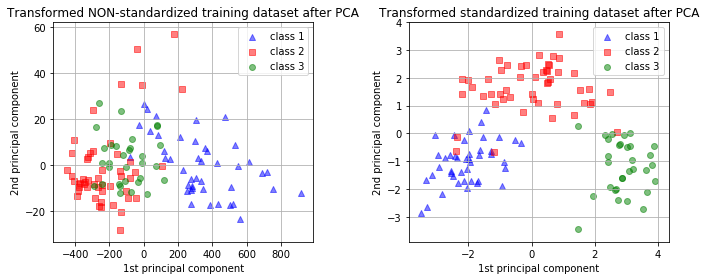

In [13]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    
    
for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  

<br>
<br>

### Evaluating the classification accuracy with and without standardization with PCA

In [14]:
# on standardized data
model = GaussianNB()
model.fit(X_train, y_train)


pred_y_train = model.predict(X_train)

print('\nPrediction accuracy on Training dataset for PCA without std ')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_y_train)))

pred_y_test = model.predict(X_test)

print('\nPrediction accuracy on Test dataset for PCA without std')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_y_test)))


Prediction accuracy on Training dataset for PCA without std 
75.81%

Prediction accuracy on Test dataset for PCA without std
74.07%



In [15]:
# on standardized data
model = GaussianNB()
model.fit(X_train_std, y_train)


pred_y_train_std = model.predict(X_train_std)

print('\nPrediction accuracy for the Std training dataset with PCA ')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_y_train_std)))

pred_y_test_std = model.predict(X_test_std)

print('\nPrediction accuracy for the Std test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_y_test_std)))


Prediction accuracy for the Std training dataset with PCA 
95.16%

Prediction accuracy for the Std test dataset with PCA
100.00%

